<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
قطعه کوچولوها
</font>
</h1>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مقدمه
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این تمرین قصد داریم تا میکروارگانیسم‌ها را قطعه‌بندی کنیم . شما برای انجام قطعه‌بندی می‌توانید از روش دلخواه خود استفاده کنید . در ادامه با مراحل کار آشنا خواهید شد.
</font>
</p>

In [232]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans
from collections import Counter

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مرحله اول: وارد کردن تصاویر
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این مرحله شما باید دو تصویر را وارد کنید. اینها تصاویری از دو میکروارگانیسم هستند که قصد داریم عملیات قطعه‌بندی را روی آنها انجام دهیم. این دو تصویر در پوشه داده تمرین قرار دارند. تصاویر عبارتند از:
    <br>
    Data/EMDS5_g01.png
    <br>
    Data/EMDS5_g02.png
</font>
</p>

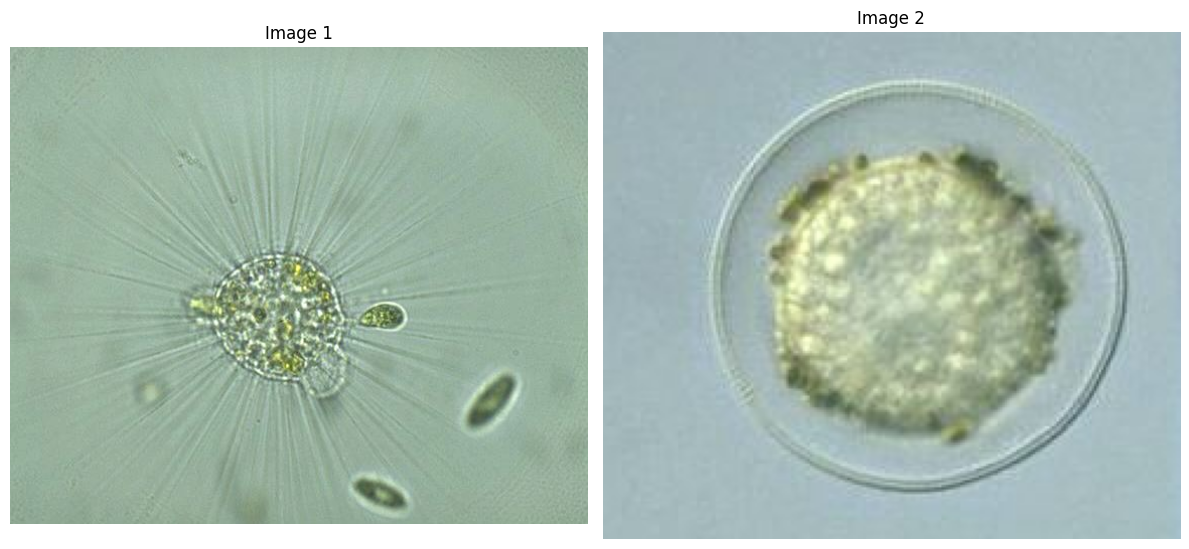

In [233]:
img1 = cv2.imread("./Data/EMDS5_g01.png", cv2.IMREAD_COLOR_RGB)
img2 = cv2.imread("./Data/EMDS5_g02.png", cv2.IMREAD_COLOR_RGB)

plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
plt.axis("off")
plt.imshow(img1)
plt.title("Image 1")


plt.subplot(1, 2, 2)
plt.axis("off")
plt.imshow(img2)
plt.title("Image 2")

plt.tight_layout()
plt.show()

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مرحله دوم: قطعه‌بندی
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این مرحله از یک تکنیک پیشرفته قطعه‌بندی استفاده کنید. هر دو تصویر را با استفاده از این تکنیک قطعه‌بندی کنید.   
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این مرحله هر دو تصویر را قطعه‌بندی کنید. دقت کنید که حتما خروجی قطعه‌بندی خود در این مرحله را حتما به حوزه خاکستری انتقال دهید. در مراحل بعدی ما از تصاویر خاکستری استفاده خواهیم کرد.
</font>
</p>

In [234]:
def k_means(image):
    pixels = image.reshape((-1, 3))
    pixels = np.float32(pixels)

    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

    K = 100
    ret1, label, center = cv2.kmeans(
        pixels, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS
    )
    center = np.uint8(center)

    res = center[label.flatten()]
    res = res.reshape((image.shape))

    return res

img1_segmented = k_means(img1)
img2_segmented = k_means(img2)

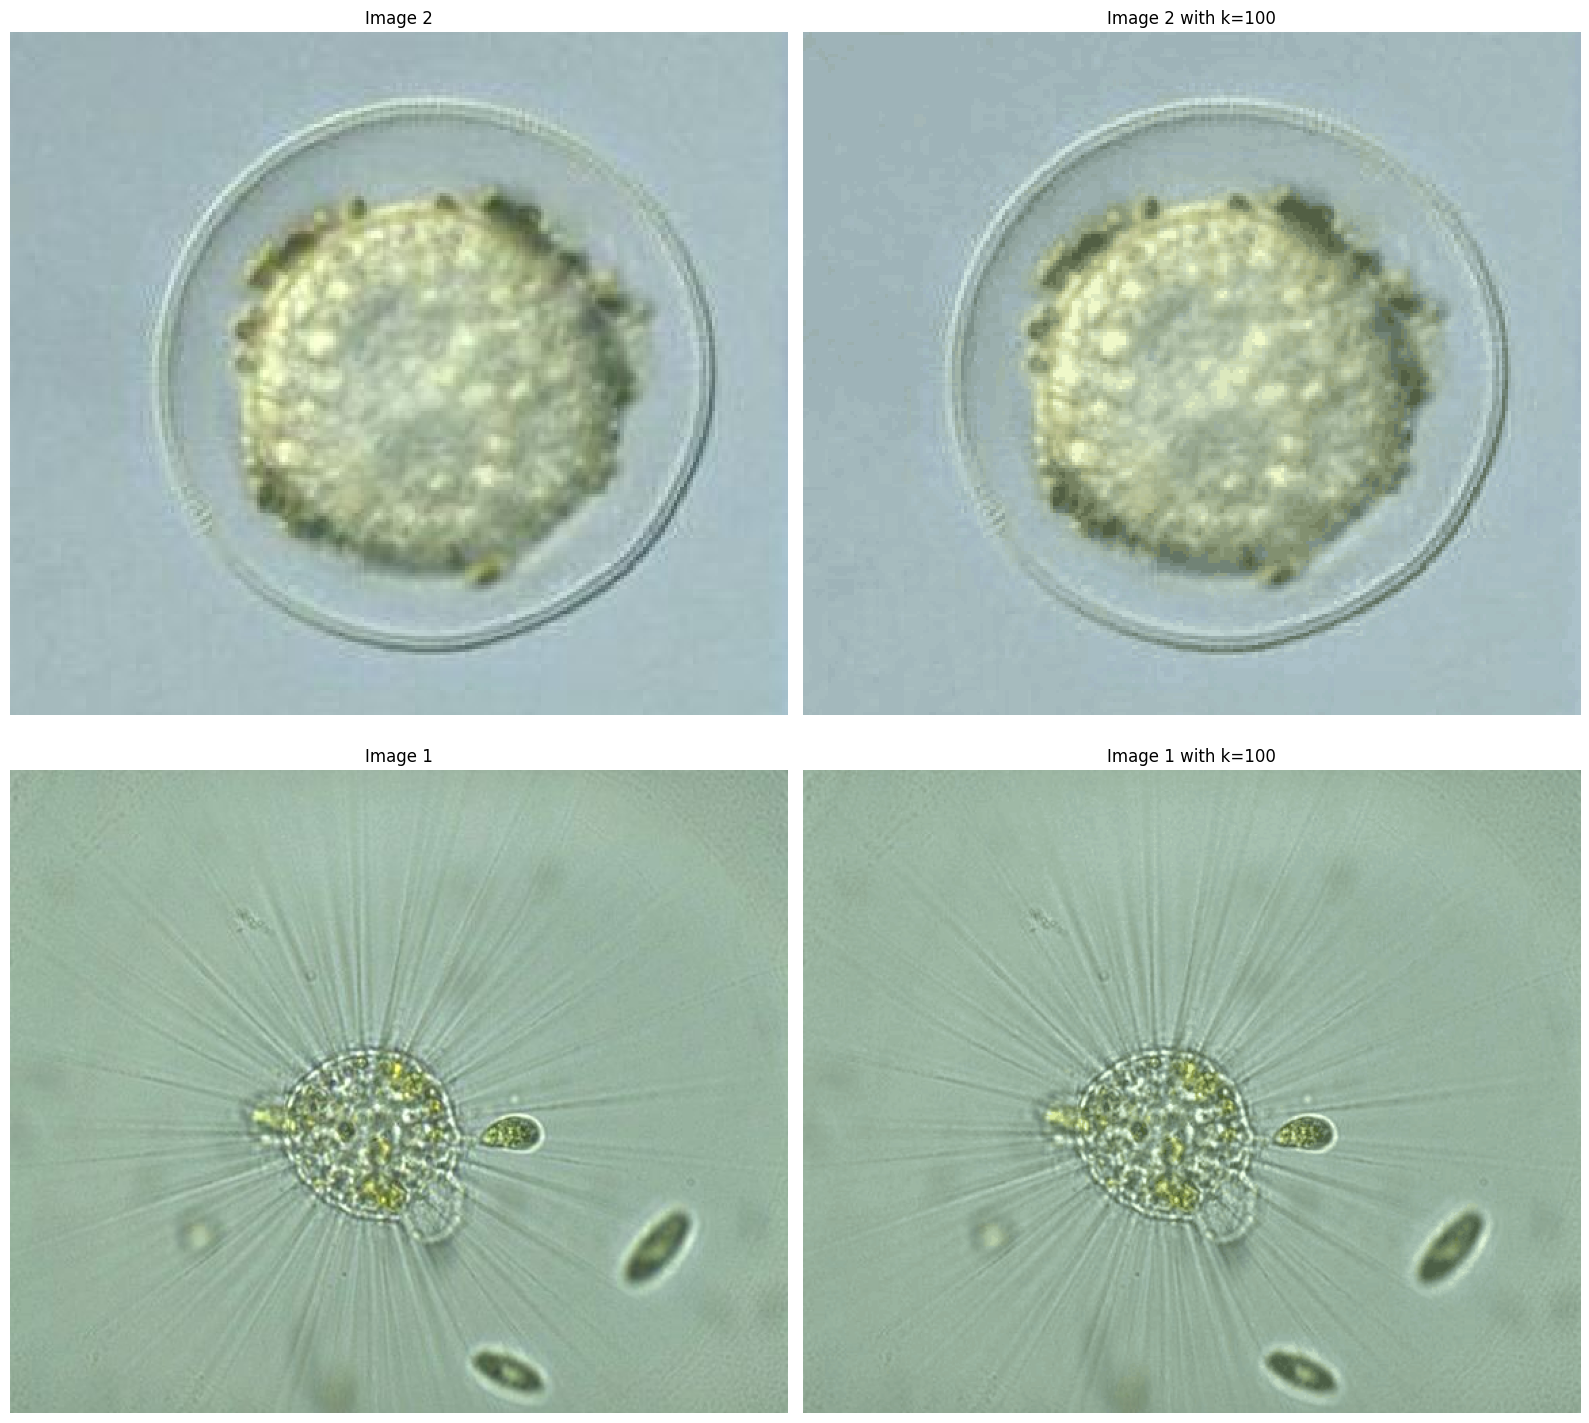

In [235]:
plt.figure(figsize=(16, 32))

plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Image 1")
plt.imshow(img1)

plt.subplot(1, 2, 2)
plt.axis("off")
plt.title("Image 1 with k=100")
plt.imshow(img1_segmented)

plt.subplot(2, 2, 1)
plt.axis("off")
plt.title("Image 2")
plt.imshow(img2)

plt.subplot(2, 2, 2)
plt.axis("off")
plt.title("Image 2 with k=100")
plt.imshow(img2_segmented)

plt.tight_layout()
plt.show()

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مرحله سوم: تولید ماسک
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    در این مرحله قصد داریم تا یک ماسک دودویی (ماسک سیاه و سفید) از تصاویر قطعه‌بندی شده مرحله قبل تولید کنیم. اینکار را می‌توان با استفاده از الگوریتم‌های قطعه‌بندی کلاسیک همانند (آستانه‌گذاری سراسری یا روش اتسو و...) انجام داد.هدف این مرحله این است که شی را از پیش‌زمینه جدا کند. دقت کنید که پیش‌زمینه حتما باید سیاه باشد و شی موجود در تصویر حتما باید سفید باشد.
</font>
</p>

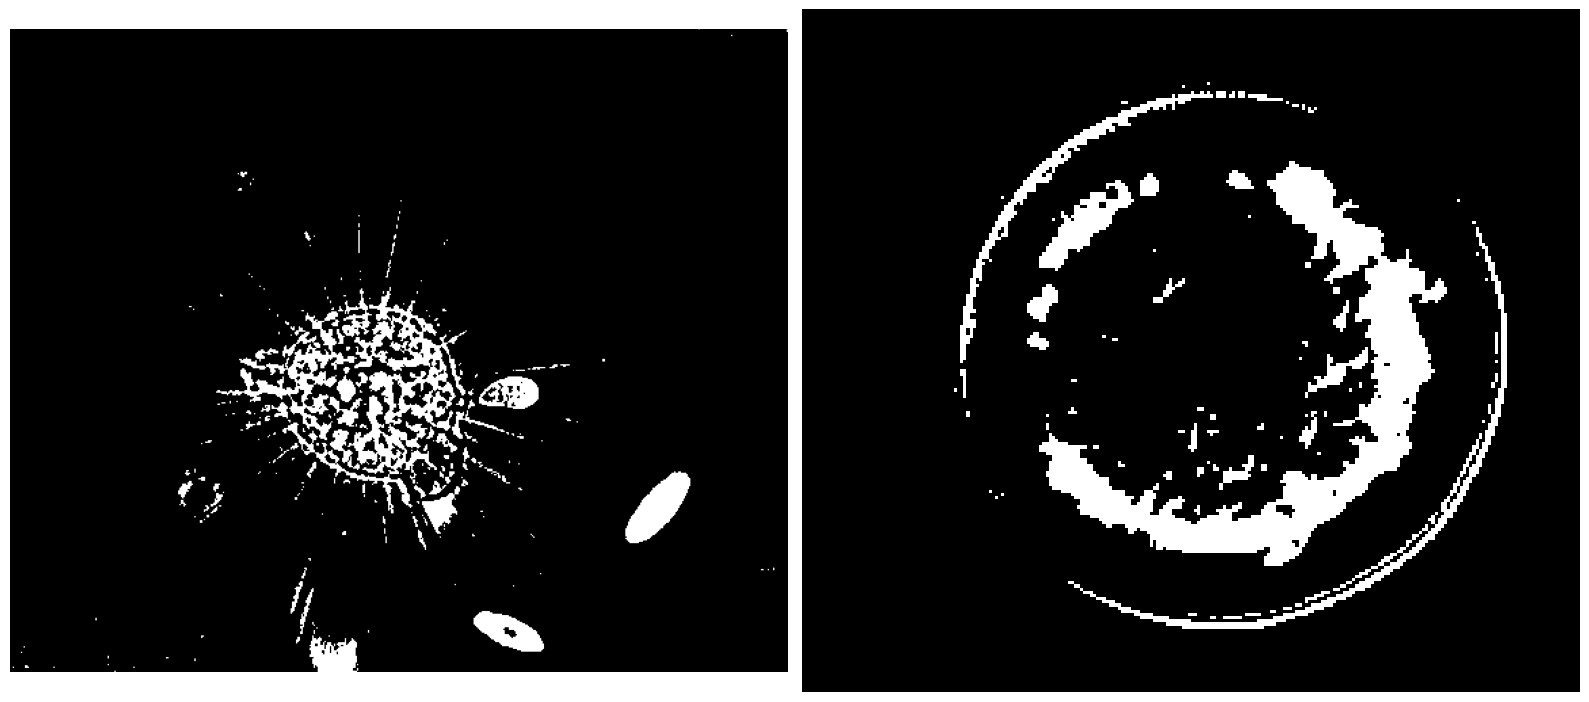

In [236]:
def threshold_otsu(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    thresh = cv2.bitwise_not(thresh)
    return thresh


segmented_1 = threshold_otsu(img1_segmented)
segmented_2 = threshold_otsu(img2_segmented)

plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.axis("off")
plt.imshow(segmented_1, "gray")

plt.subplot(1, 2, 2)
plt.axis("off")
plt.imshow(segmented_2, "gray")

plt.tight_layout()
plt.show()

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مرحله چهارم: ذخیره‌سازی
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این مرحله ماسک‌های سیاه و سفید تولیدشده در مراحل قبل را به نام‌های زیر ذخیره کنید. توجه کنید که تصاویر را در حوزه خاکستری ذخیره کنید.
        <br>
    EMDS5_g01_segmented.png
    <br>
    EMDS5_g02_segmented.png
</font>
</p>

In [237]:
cv2.imwrite("EMDS5_g01_segmented.png",segmented_1)
cv2.imwrite("EMDS5_g02_segmented.png",segmented_2)


True

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مرحله پنجم: سلول جواب‌ساز
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در مرحله آخر، بدون هیچ تغییری، این سلول را اجرا کنید تا پاسخ شما آماده شود.
</font>
</p>

In [238]:
import zipfile

def compress(file_names):
    print("File Paths:")
    print(file_names)
    # Select the compression mode ZIP_DEFLATED for compression
    # or zipfile.ZIP_STORED to just store the file
    compression = zipfile.ZIP_DEFLATED
    # create the zip file first parameter path/name, second mode
    with zipfile.ZipFile("result.zip", mode="w") as zf:
        for file_name in file_names:
            # Add file to the zip file
            # first parameter file to zip, second filename in zip
            zf.write('./' + file_name, file_name, compress_type=compression)


file_names = ["notebook.ipynb", "EMDS5_g01_segmented.png", "EMDS5_g02_segmented.png"]
compress(file_names)

File Paths:
['notebook.ipynb', 'EMDS5_g01_segmented.png', 'EMDS5_g02_segmented.png']
